# Data analysis template

This notebook shows how to read the output of the simulation in a pandas Dataframe. 


In [15]:
# Imports for HDF5 I/O, analysis and plotting
import h5py
import json
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

In [62]:
# Useful functions to read the output of the simulations

def read_stats_df(stats_path: Path) -> pd.DataFrame:
    # Read stats.h5 into a tidy DataFrame using stored fieldnames
    with h5py.File(stats_path, "r", swmr=True) as fh:
        dset = fh["stats"]
        dset.refresh()
        fieldnames = [s.decode("utf-8") for s in dset.attrs["fieldnames"]]
        return pd.DataFrame(dset[...], columns=fieldnames)

def read_state_df(state_path: Path) -> pd.DataFrame:
    # Read state.h5 into a DataFrame; each column is one agent state
    with h5py.File(state_path, "r", swmr=True) as fh:
        dset_state = fh["state"]
        dset_time = fh["time"]
        dset_step = fh["step"]
        dset_state.refresh()
        dset_time.refresh()
        dset_step.refresh()
        state = dset_state[...]
        df = pd.DataFrame(state, columns=[f"x_{i}" for i in range(state.shape[1])])
        df.insert(0, "t", dset_time[...])
        df.insert(0, "step", dset_step[...])
        return df

def read_timings(timings_path: Path) -> dict:
    return json.loads(Path(timings_path).read_text())

def read_config(config_path: Path) -> dict:
    return json.loads(Path(config_path).read_text())

Below we read the output of the simulations


In [75]:
results_dir = Path("./") # set the path of the directory where the output is

# Load outputs produced by the simulation
stats_df = read_stats_df(results_dir / "stats_kuramoto_all_to_all.h5")
state_df = read_state_df(results_dir / "state_kuramoto_all_to_all.h5")
# parameters = read_config(results_dir / "config_used_kuramoto_all_to_all.json")
# timings = read_timings(results_dir / "timings_kuramoto_all_to_all.json")

In [76]:
stats_df.head()

,step,t,order_param,phase_var,energy
0,0.0,0.0,0.015887,3.329479,-0.000269
1,1000.0,10.0,0.006779,3.271513,-0.000212
2,2000.0,20.0,0.002797,3.282276,-0.000058
3,3000.0,30.0,0.009798,3.270530,-0.000213
4,4000.0,40.0,0.015436,3.234833,-0.000928


In [77]:
state_df.head()

,step,t,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_990,x_991,x_992,x_993,x_994,x_995,x_996,x_997,x_998,x_999
0,0,0.0,0.087903,4.648157,5.239895,4.524376,4.811185,0.456423,5.064836,3.994835,...,1.280285,5.808597,0.462016,6.005297,1.433996,2.856659,2.937984,1.729113,1.909181,4.474337
1,1000,10.0,0.034507,4.072961,5.189686,5.150308,5.212928,0.658302,5.698643,3.904858,...,1.414165,6.262482,0.437180,0.687778,1.719569,2.618088,2.667653,1.574064,1.457572,4.898234
2,2000,20.0,0.555890,4.415361,4.981159,5.407840,4.518616,0.480346,5.789331,4.253823,...,1.347229,0.770296,0.539680,0.479755,1.986603,2.472473,2.959160,1.602911,1.639709,5.067519
3,3000,30.0,0.745862,4.240720,5.116624,5.416003,4.982828,0.379744,5.876926,4.374771,...,1.776720,0.533388,0.497927,0.328561,2.429273,2.461459,3.259983,1.584298,1.927637,4.906023
4,4000,40.0,0.567029,4.014894,4.924020,5.269415,4.468592,0.269963,6.020557,4.384368,...,2.212024,0.838914,0.559678,0.294951,2.342319,2.351604,3.081596,1.743794,1.894062,4.629296


Sample plots: statistics over time and empirical measure at a given time

Text(0, 0.5, 'count')

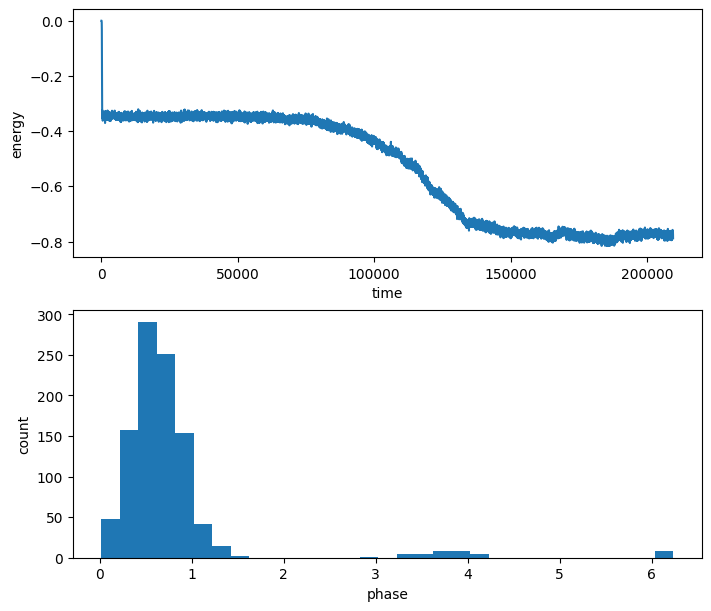

In [78]:
# Plot order parameter over time
fig, ax = plt.subplots(2, 1, figsize=(7, 6), constrained_layout=True)
stats_df.plot(x="t", y="energy", ax=ax[0], legend=False)
ax[0].set_xlabel("time")
ax[0].set_ylabel("energy")

# Histogram of phases at the last saved time
last_row = state_df.iloc[-1]
phase_values = last_row.filter(like="x_").to_numpy()
ax[1].hist(phase_values, bins=int(np.sqrt(phase_values.size)))
ax[1].set_xlabel("phase")
ax[1].set_ylabel("count")
